<a href="https://colab.research.google.com/github/pingping-0606/Python_dataviz2024/blob/main/Visualize_Data_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

สอน 1 เมษา 2564

In [ ]:
import pandas as pd
import os
from datetime import datetime as dt
from datetime import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/barchart_data.csv'

In [ ]:
data = pd.read_csv(os.path.join(path,'/content/barchart_data.csv'))
data = data.iloc[:,1:]
data.head()

,Year,Quarter,Region,Brand,Price Category,Sales
0,2021,Q1,North America,BrandA,Budget,8270
1,2021,Q1,North America,BrandA,Mid-range,1860
2,2021,Q1,North America,BrandA,Premium,6390
3,2021,Q1,North America,BrandB,Budget,6191
4,2021,Q1,North America,BrandB,Mid-range,6734


In [ ]:
# prompt: replace word Bugget in the price Category with รุ่นประหยัด
data['Price Category'] = data['Price Category'].replace('Budget', 'รุ่นประหยัด') # Changed 'price Category' to 'Price Category'
data['Price Category'] = data['Price Category'].replace('Mid-range', 'รุ่นเริ่มต้น') # Changed 'price Category' to 'Price Category'
data['Price Category'] = data['Price Category'].replace('Premium', 'รุ่นเรือธง') # Changed 'price Category' to 'Price Category'

In [ ]:
data

,Year,Quarter,Region,Brand,Price Category,Sales
0,2021,Q1,North America,BrandA,รุ่นประหยัด,8270
1,2021,Q1,North America,BrandA,รุ่นเริ่มต้น,1860
2,2021,Q1,North America,BrandA,รุ่นเรือธง,6390
3,2021,Q1,North America,BrandB,รุ่นประหยัด,6191
4,2021,Q1,North America,BrandB,รุ่นเริ่มต้น,6734
...,...,...,...,...,...,...
475,2022,Q4,Africa,BrandC,รุ่นเริ่มต้น,6486
476,2022,Q4,Africa,BrandC,รุ่นเรือธง,9335
477,2022,Q4,Africa,BrandD,รุ่นประหยัด,5980
478,2022,Q4,Africa,BrandD,รุ่นเริ่มต้น,8266


## เตรียมข้อมูล

#### แปลงข้อมูลบอกเวลาให้เป็นตัวแปรชนิด datetime

In [ ]:
data['search_timestamp']  = pd.to_datetime(data['search_timestamp'],format='%Y-%m-%d %H:%M:%S',errors='coerce')

## Bar chart (กราฟแท่ง)
(กราฟผลไม้)

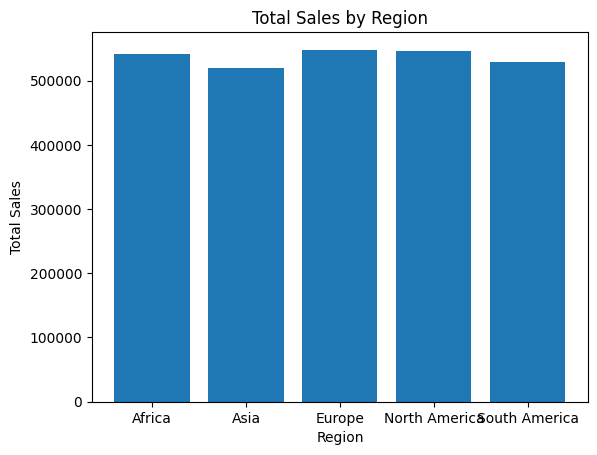

In [ ]:
# prompt: สร้าง barchart เปรียบเทียบปริมาณ sales ทั้งหมดของแต่ละ region ด้วยคำสั่ง plt.bar

import matplotlib.pyplot as plt

# Group data by region and sum the sales
region_sales = data.groupby('Region')['Sales'].sum()

# Create the bar chart
plt.bar(region_sales.index, region_sales.values)

# Set labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region')

# Show the plot
plt.show()


In [ ]:
region_sales

,Sales
Region,
Africa,541556
Asia,519608
Europe,548068
North America,545563
South America,529246


In [ ]:
#วิธีเลือกแบบ dictionary
region_sales.reset_index()['Region']

,Region
0,Africa
1,Asia
2,Europe
3,North America
4,South America


In [ ]:
region_sales.values

array([541556, 519608, 548068, 545563, 529246])

In [ ]:
region_sales.index

Index(['Africa', 'Asia', 'Europe', 'North America', 'South America'], dtype='object', name='Region')

In [ ]:
# Groupby data by region
region_sales = data.groupby(['Region','Quarter'])['Sales'].sum()
region_sales

Region         Quarter
Africa         Q1         124543
               Q2         144451
               Q3         141602
               Q4         130960
Asia           Q1         123201
               Q2         140369
               Q3         125413
               Q4         130625
Europe         Q1         136996
               Q2         139328
               Q3         141905
               Q4         129839
North America  Q1         130631
               Q2         144435
               Q3         124104
               Q4         146393
South America  Q1         127485
               Q2         138468
               Q3         132925
               Q4         130368
Name: Sales, dtype: int64

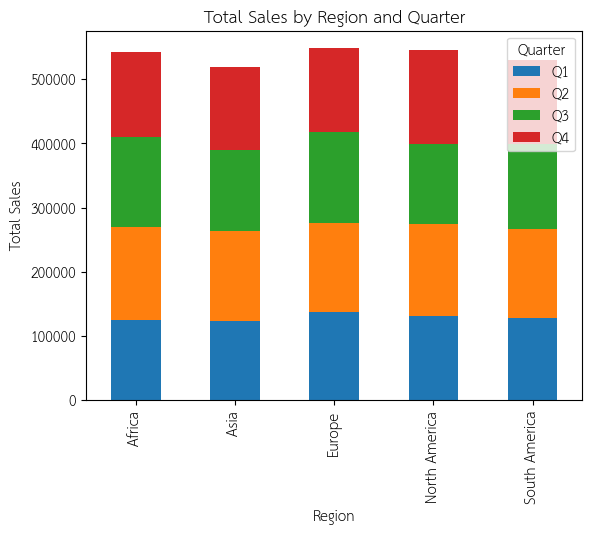

In [ ]:
# prompt: สร้าง barchart เปรียบเทียบปริมาณ sales ทั้งหมดในแต่ละ quarter ของแต่ละ region ด้วย stacked barchart

import matplotlib.pyplot as plt
# Group data by region and quarter, then sum the sales
region_quarter_sales = data.groupby(['Region', 'Quarter'])['Sales'].sum().unstack()

# Create the stacked bar chart
region_quarter_sales.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Quarter')

# Show the plot
plt.show()


## plot stacked barchart ของแต่ละ region โดยดูจาก contribution ของ Price category


การแสดงตัวอักษรภาษาไทยในกราฟ matplotlib
https://medium.com/@kanyawee.work/%E0%B9%81%E0%B8%AA%E0%B8%94%E0%B8%87%E0%B8%9C%E0%B8%A5%E0%B8%A0%E0%B8%B2%E0%B8%A9%E0%B8%B2%E0%B9%84%E0%B8%97%E0%B8%A2%E0%B9%83%E0%B8%99%E0%B8%81%E0%B8%A3%E0%B8%B2%E0%B8%9F%E0%B8%82%E0%B8%AD%E0%B8%87-matplotlib-%E0%B8%9A%E0%B8%99-google-colab-37210d9a9f31


https://colab.research.google.com/drive/1sTdTZx_Cm51mc8OL_QHtehWyO4725sGl#scrollTo=Ak9SbVd5L7U8

In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [ ]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

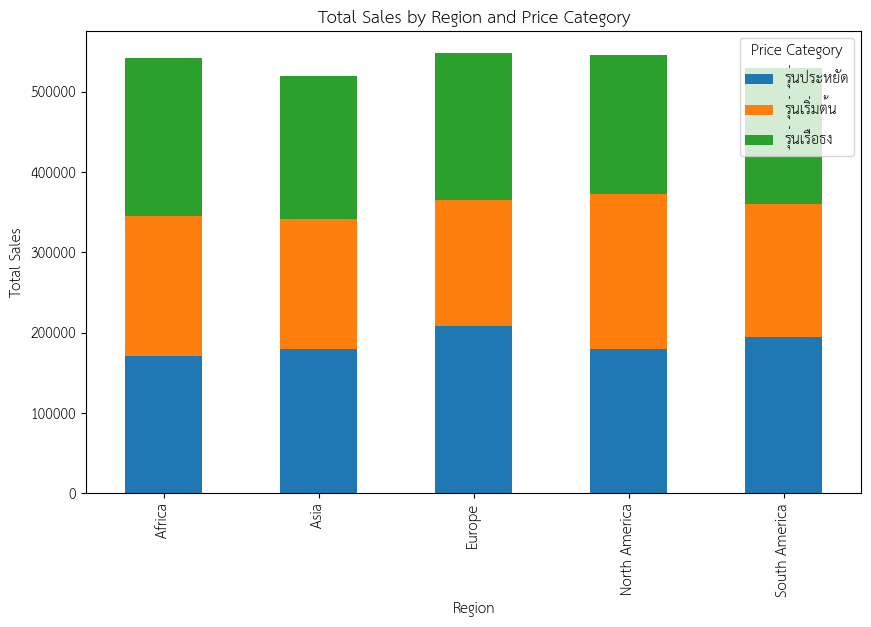

In [ ]:
# Group data by region and price category, then sum the sales
region_price_category_sales = data.groupby(['Region', 'Price Category'])['Sales'].sum().unstack() #stacked barchartจะบอกว่ากราฟแต่ละแท่งประกอบด้วยอะไรบ้าง

# Create the stacked bar chart
region_price_category_sales.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Price Category')

# Show the plot
plt.show()

## Plot stacked barchart ด้วย matplotlip

In [ ]:
region_brand_category_sales = data.groupby(['Region', 'Brand'])['Sales'].sum().unstack()
region_brand_category_sales


Brand,BrandA,BrandB,BrandC,BrandD
Region,,,,
Africa,132019,140187,132273,137077
Asia,136205,124678,139677,119048
Europe,135638,135069,131700,145661
North America,124810,153135,140802,126816
South America,144169,138543,115774,130760


In [ ]:
region_price_category_sales = data.groupby(['Region', 'Brand'])['Sales'].sum().unstack()
region_price_category_sales

Brand,BrandA,BrandB,BrandC,BrandD
Region,,,,
Africa,132019,140187,132273,137077
Asia,136205,124678,139677,119048
Europe,135638,135069,131700,145661
North America,124810,153135,140802,126816
South America,144169,138543,115774,130760


In [ ]:
region_price_category_sales['BrandA'].values

array([132019, 136205, 135638, 124810, 144169])

## plot ส่วนแรก

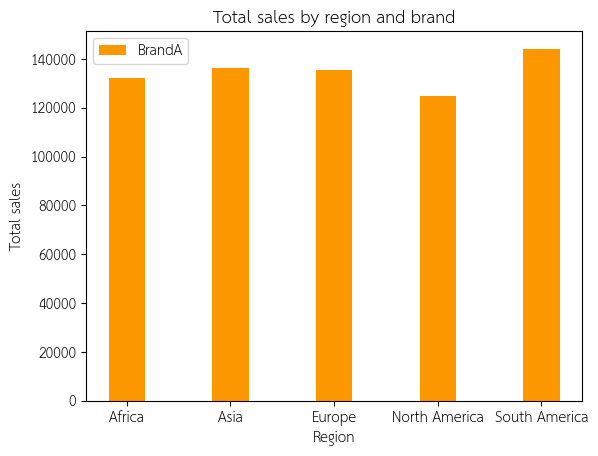

In [ ]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(region_price_category_sales.index, region_price_category_sales['BrandA'].values, width, label='BrandA',color = '#fc9700')
#ax.bar(labels, b4midnight, width, bottom=b4lunch, label='before midnight',color = '#19038a')

ax.set_ylabel('Total sales')
ax.set_xlabel('Region')
ax.set_title('Total sales by region and brand')
ax.legend()

plt.show()

## plot ส่วนที่ 2

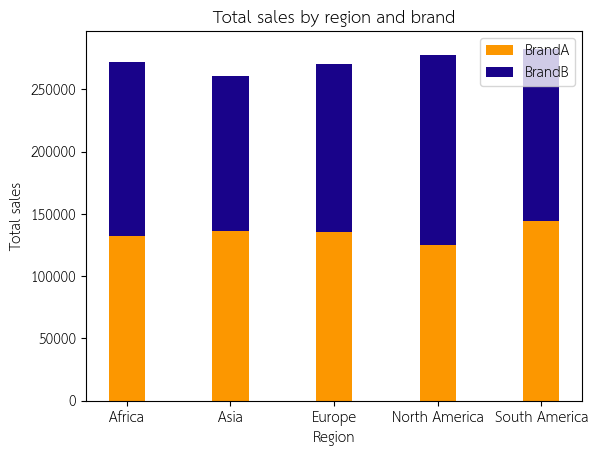

In [ ]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(region_price_category_sales.index, region_price_category_sales['BrandA'].values, width, label='BrandA',color = '#fc9700')
ax.bar(region_price_category_sales.index, region_price_category_sales['BrandB'].values, width, bottom=region_price_category_sales['BrandA'].values, label='BrandB',color = '#19038a')
#ax.bar(labels, b4midnight, width, bottom=b4lunch, label='before midnight',color = '#19038a')

ax.set_ylabel('Total sales')
ax.set_xlabel('Region')
ax.set_title('Total sales by region and brand')
ax.legend()

plt.show()

## plot ส่วนที่ 3

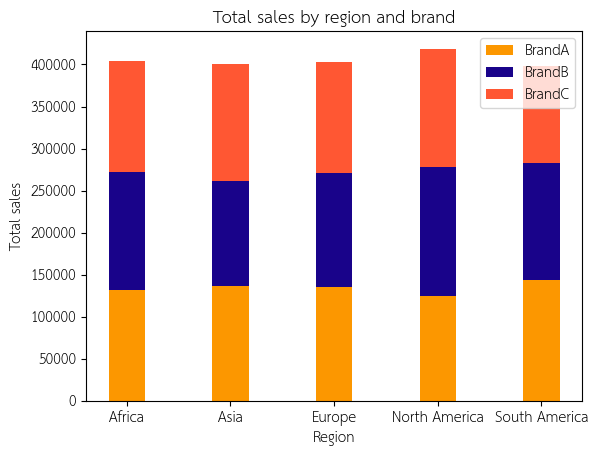

In [ ]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(region_price_category_sales.index, region_price_category_sales['BrandA'].values, width, label='BrandA',color = '#fc9700')
ax.bar(region_price_category_sales.index, region_price_category_sales['BrandB'].values, width, bottom=region_price_category_sales['BrandA'].values, label='BrandB',color = '#19038a')
ax.bar(region_price_category_sales.index, region_price_category_sales['BrandC'].values, width, bottom=region_price_category_sales['BrandB']+region_price_category_sales['BrandA'].values, label='BrandC',color = '#FF5733')

ax.set_ylabel('Total sales')
ax.set_xlabel('Region')
ax.set_title('Total sales by region and brand')
ax.legend()

plt.show()

## plot ส่วนที่ 4

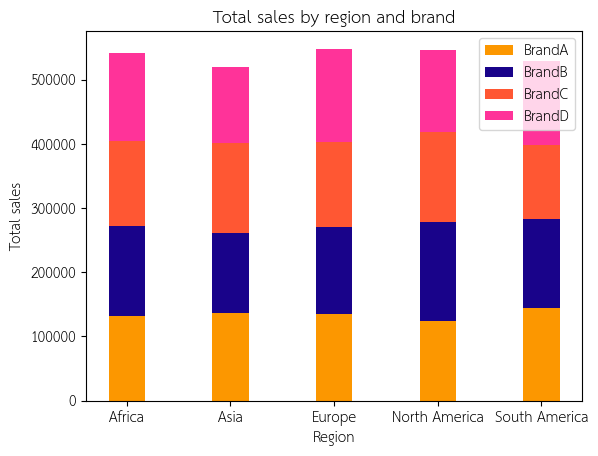

In [ ]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(region_price_category_sales.index, region_price_category_sales['BrandA'].values, width, label='BrandA',color = '#fc9700')
ax.bar(region_price_category_sales.index, region_price_category_sales['BrandB'].values, width, bottom=region_price_category_sales['BrandA'].values, label='BrandB',color = '#19038a')
ax.bar(region_price_category_sales.index, region_price_category_sales['BrandC'].values, width, bottom=region_price_category_sales['BrandB']+region_price_category_sales['BrandA'].values, label='BrandC',color = '#FF5733')
ax.bar(region_price_category_sales.index, region_price_category_sales['BrandD'].values, width, bottom=region_price_category_sales['BrandC']+region_price_category_sales['BrandB'].values+region_price_category_sales['BrandA'].values, label='BrandD',color = '#ff3399')

ax.set_ylabel('Total sales')
ax.set_xlabel('Region')
ax.set_title('Total sales by region and brand')
ax.legend()

plt.show()

## Grouped bar chart (เปรียบเทียบในกลุ่ม)

https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

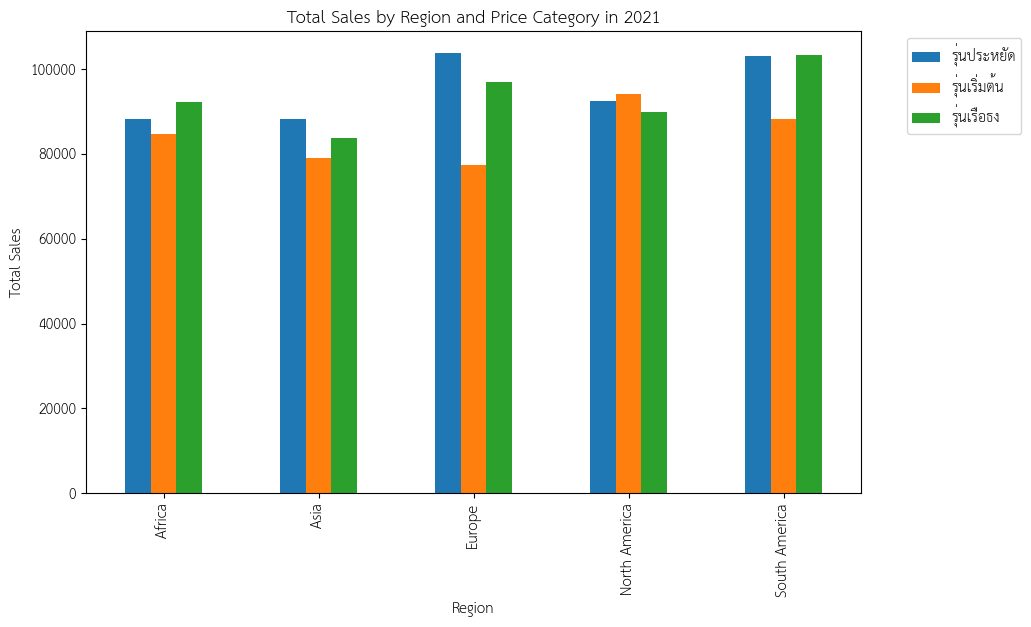

In [ ]:
# prompt: plot Grouped Bar chart ของแต่ละ region ในปี2021 เพื่อเปรียบเทียบ sales ของแต่ละ price category ย้าย legend ออกไปข้างนอก

# Filter data for the year 2021
data_2021 = data[data['Year'] == 2021]

# Group data by region, price category, and year, then sum the sales
region_price_category_sales_2021 = data_2021.groupby(['Region', 'Price Category'])['Sales'].sum().unstack()

# Create the grouped bar chart
ax = region_price_category_sales_2021.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Price Category in 2021')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


## plot group barchart ของหนังอินเดีย โดยแยกกลุ่มตามประเภทหนัง และเปรียบเทียบ rating จากความยาวของหนัง

In [ ]:
path = '/content/IMDb Movies India.csv'

In [ ]:
import pandas as pd
import os

path = '/content/IMDb Movies India.csv'

# Use 'latin-1' encoding
data_india = pd.read_csv(path, encoding='latin-1') # Changed the encoding to 'latin-1' and removed the unnecessary join

data_india = data_india.iloc[:,1:] # Assuming you have a 'data' DataFrame defined
data_india.head()


,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
data_india = data_india.dropna(subset=['Rating','Duration','Genre'])
data_india = data_india[['Rating','Duration','Genre']]
data_india

,Rating,Duration,Genre
1,7.0,109,Drama
3,4.4,110,"Comedy, Romance"
5,4.7,147,"Comedy, Drama, Musical"
6,7.4,142,"Drama, Romance, War"
8,5.6,82,"Horror, Mystery, Thriller"
...,...,...,...
15493,6.1,115,Drama
15494,6.2,153,"Biography, Drama, History"
15503,5.8,125,"Action, Crime, Drama"
15505,4.5,129,"Action, Drama"


In [ ]:
# prompt: แปลงค่าในคอลัมน์ Duration เป็น int โดยลบ min ออกและ เปลี่ยนชนิดข้อมูลเป็น integer
# Remove "min" form the 'Duration' column and convert to integer
data_india['Duration'] = data_india['Duration'].astype(str).str.replace(' min', '').astype(int) # Changed the code to first convert the 'Duration' column to string type


In [ ]:
# prompt: แยกตารางออกเป็นตารางย่อย 5 ตาราง สำหรับ genre : drama, action, romance, horror, musical

# Create a dictionary to store the tables
genre_tables = {}

# Define the genres to extract
genres = ['drama', 'action', 'romance', 'horror', 'musical']

# Iterate through the genres and create separate tables
for genre in genres:
  genre_tables[genre] = data_india[data_india['Genre'].str.contains(genre, case=False, na=False)]

# Access the tables using the genre as the key
# Example:
# drama_table = genre_tables['drama']


In [ ]:
all_table.groupby(['Genre','Duration'])

แสดงปริมาณคนเข้าเว๊ปในแต่ละวัน โดยเปรียบเทียบช่วงเวลา 11:00-12:00 กับ 23:00-24:00

In [ ]:
data[(data['search_timestamp'].dt.dayofweek == 0)
& (data['search_timestamp'].dt.time < time(hour=12))
& (data['search_timestamp'].dt.time >= time(hour=11))].shape[0]  # monday 11:00-12:00

73249

In [ ]:
b4lunch = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0]
                         ]

In [ ]:
b4lunch

[73249, 73083, 75429, 78024, 99007, 174165, 165440]

In [ ]:
data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]

31874

In [ ]:
b4midnight = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]
                         ]
b4midnight

[31874, 32258, 31153, 35944, 53174, 58306, 35801]

In [ ]:
labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [ ]:
import numpy as np

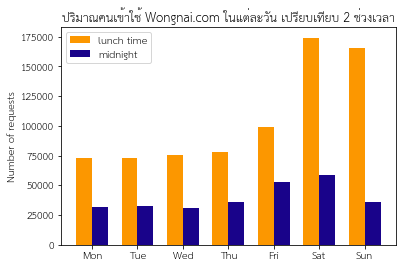

In [ ]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, b4lunch, width, label='lunch time',color = '#fc9700')
rects2 = ax.bar(x + width/2, b4midnight, width, label='midnight',color = '#19038a')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

## Stacked bar chart

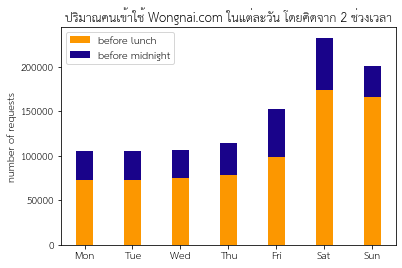

In [ ]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, b4lunch, width, label='before lunch',color = '#fc9700')
ax.bar(labels, b4midnight, width, bottom=b4lunch, label='before midnight',color = '#19038a')

ax.set_ylabel('number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()

plt.show()

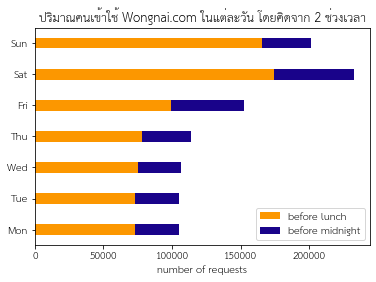

In [ ]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels, b4lunch, width, label='before lunch',color = '#fc9700')
ax.barh(labels, b4midnight, width, left=b4lunch, label='before midnight',color = '#19038a')

ax.set_xlabel('number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()

plt.show()

## [เช็คชื่อ] โดยให้วาด Bar chart ที่เปรียบเทียบปริมาณคนใช้งาน Wongnai.com สองช่วงเวลา โดยให้กราฟแสดงสัดส่วนของปริมาณคนใช้งานในแต่ละวันด้วย

## Histogram

## กราฟแสดงความถี่ของข้อมูล

ตัวอย่างข้อมูลที่ random มาจาก normal distribution ที่มี mean = 100  และ stdev = 15

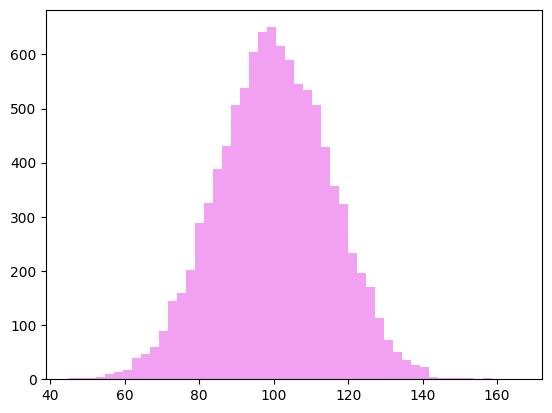

In [2]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(2024)

mu, sigma = 100, 15
X = mu + sigma * np.random.randn(10000)

plt.hist(X, 50, facecolor = 'violet', alpha = 0.75);

ทดสอบกับข้อมูล หนังอินเดีย

In [3]:
import pandas as pd
import os

path = '/content/IMDb Movies India.csv'

# Use 'latin-1' encoding
data_india = pd.read_csv(path, encoding='latin-1') # Changed the encoding to 'latin-1' and removed the unnecessary join

data_india = data_india.iloc[:,1:] # Assuming you have a 'data' DataFrame defined
data_india.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [7]:
len(set(data_india.dropna(subset=['Genre'])['Genre']))

485

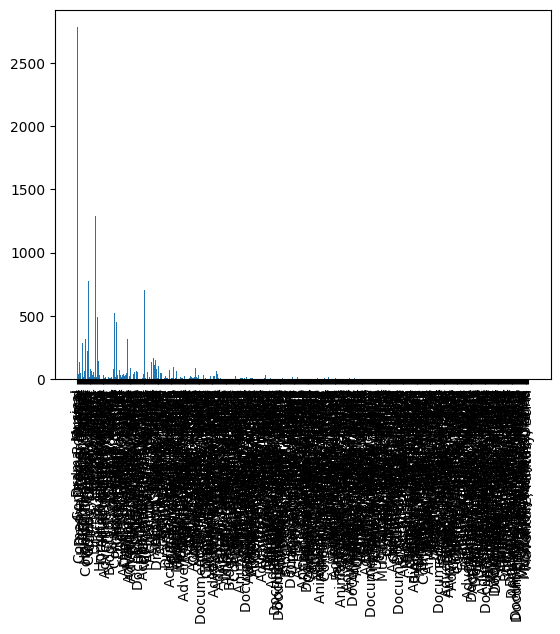

In [9]:
plt.hist(data_india.dropna(subset=['Genre'])['Genre'], bins = len(set(data_india.dropna(subset=['Genre'])['Genre'])))
plt.xticks(rotation='vertical');

In [17]:
data_india = data_india.dropna(subset=['Genre'])

Index(['Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2',
       'Actor 3', 'Genre_1', 'Genre_2', 'Genre_3', 'Genre1', 'Genre2',
       'Genre3'],
      dtype='object')


KeyError: ['genre']

In [15]:
import pandas as pd
# Split the 'Genre' column by ',' and create new columns
genres = data_india['Genre'].str.split(',', expand=True) # Changed 'Split' to 'split'

# Rename the new columns
genres.columns = ['Genre1','Genre2','Genre3'] # Removed 'Split.'

# Drop the original 'Genre' column
data_india.drop('Genre', axis=1, inplace=True)

# Concatenate the new columns with the original DataFrame
data_india = pd.concat([data_india, genres], axis=1) # Changed 'genre.Split' to 'genres'

# Print the updated DataFrame
data_india.head()

KeyError: 'Genre'

# Quiz15 นับหาพระเอก-นางเอก ที่มักจะแสดงคู่กันด้วย Histrogram (พระเอก actor1,นางเอก actor2)

In [19]:
# Assuming 'data_india' is your DataFrame and it contains 'Actor 1' and 'Actor 2' columns
actor_pairs = data_india.groupby(['Actor 1', 'Actor 2'])['Actor 1'].count().reset_index(name='Count')

# Sort the pairs by the count in descending order
actor_pairs = actor_pairs.sort_values('Count', ascending=False)

# Print the top N actor pairs (e.g., top 10)
print(actor_pairs.head(10))

# You can also visualize this data using a histogram or bar chart
# to see the frequency of different actor pairs.

             Actor 1          Actor 2  Count
4117       Jeetendra            Rekha     21
2738      Dharmendra      Hema Malini     16
4098       Jeetendra       Jaya Prada     15
2481      Dara Singh           Mumtaz     11
3106  Fearless Nadia       John Cawas     10
4116       Jeetendra        Reena Roy     10
1501     Ashok Kumar   Nalini Jaywant     10
4095       Jeetendra      Hema Malini     10
7627   Rajesh Khanna  Sharmila Tagore     10
7402      Raj Babbar      Smita Patil      9


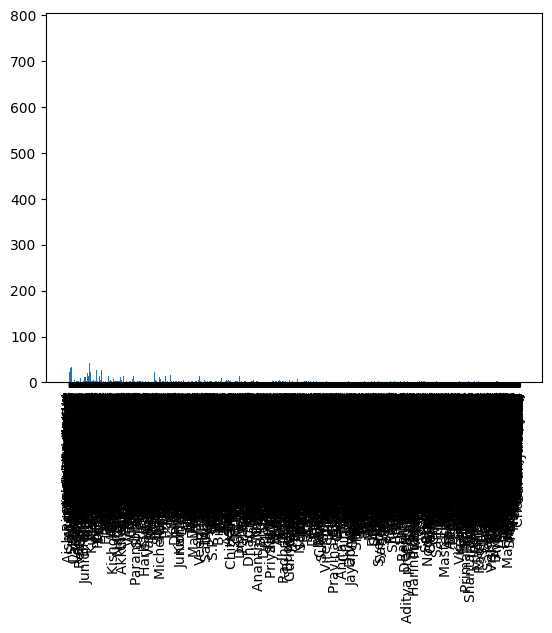

In [25]:
import matplotlib.pyplot as plt

# Convert 'Actor 2' column to string type before plotting
data_india['Actor 2'] = data_india['Actor 2'].astype(str)

plt.hist(data_india.dropna(subset=['Actor 1'])['Actor 2'], bins = len(set(data_india.dropna(subset=['Actor 1'])['Actor 2'])))
plt.xticks(rotation='vertical');

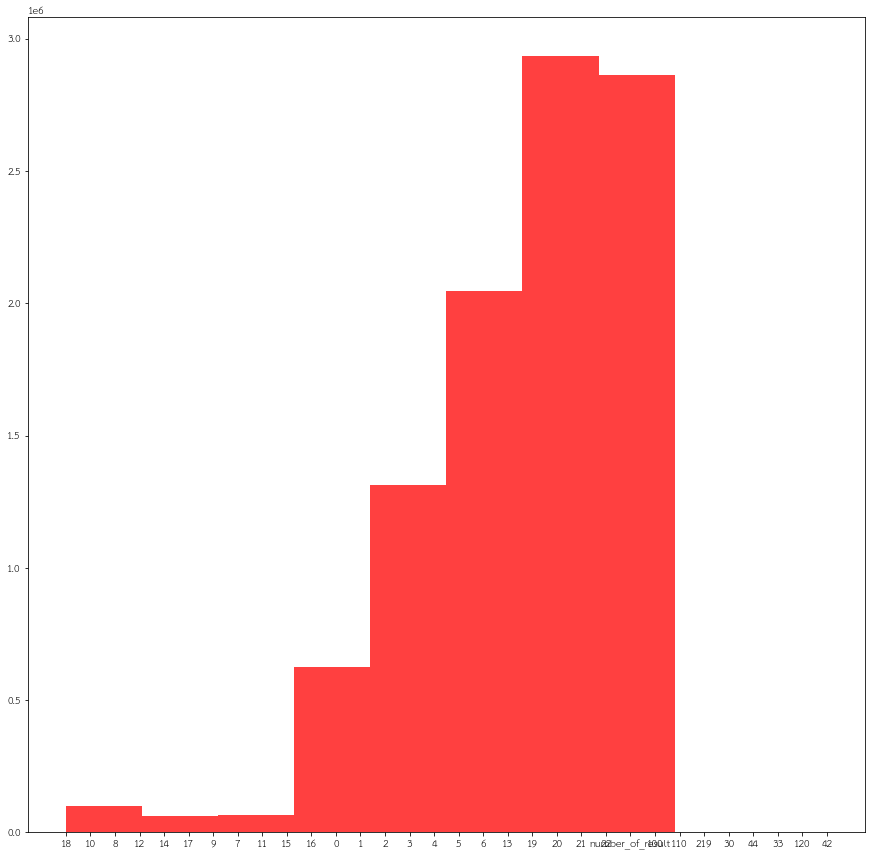

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[15,15]
output = plt.hist(list(data['number_of_result']),10,facecolor = 'red' ,alpha = 0.75)

แก้ไข แกน x ที่เรียงข้อมูลผิด

In [ ]:
data.dtypes

Unnamed: 0                   int64
search_id                   object
search_timestamp    datetime64[ns]
user_agent                  object
q                           object
user_id                    float64
session_id                  object
number_of_result            object
lat                         object
long                        object
dtype: object

เรียกดู data type ของ ตัวแปร

In [ ]:
type(data['number_of_result'][0])

int

ตรวจสอบ data type ของตัวแปร

In [ ]:
type(data['number_of_result'][0]) == int

True

ตรวจสอบดูทุกๆค่าใน column 'number_of_result'

In [ ]:
# for x in data['number_of_result']:
#     if type(x) != int:
#         print(f'{x} -> {type(x)}')


In [ ]:
new_type = data['number_of_result'].astype('int32')

ValueError: ignored

ลบ record ที่มีค่า ใน column 'number_of_result' เป็น number of result

In [ ]:
data[data['number_of_result']=='number_of_result']

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
1000016,1000032,search_id,NaT,user_agent,original_q,228667.0,session_id,number_of_result,lat,long


In [ ]:
data = data.drop(1000016)

In [ ]:
data[data['number_of_result']=='number_of_result']

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long


In [ ]:
new_type = data['number_of_result'].astype('int32')

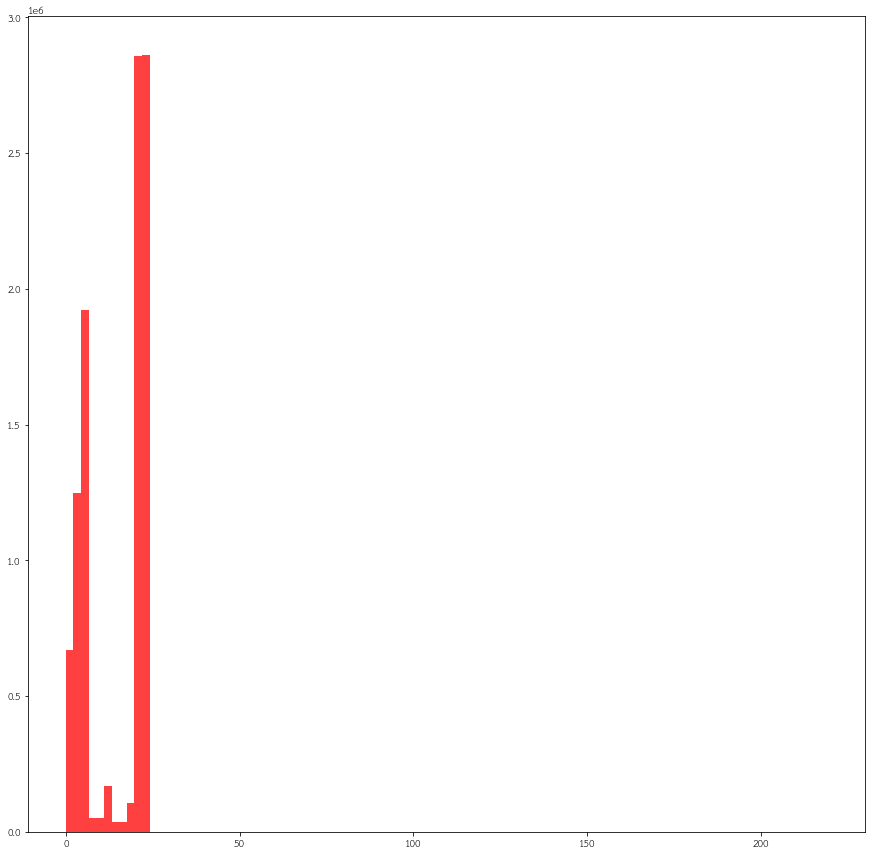

In [ ]:
output = plt.hist(new_type,100,facecolor = 'red' ,alpha = 0.75)

ลบ outlier

In [ ]:
new_type_nooutlier = new_type[new_type < 25]

In [ ]:
new_type.shape[0] - new_type_nooutlier.shape[0]

14

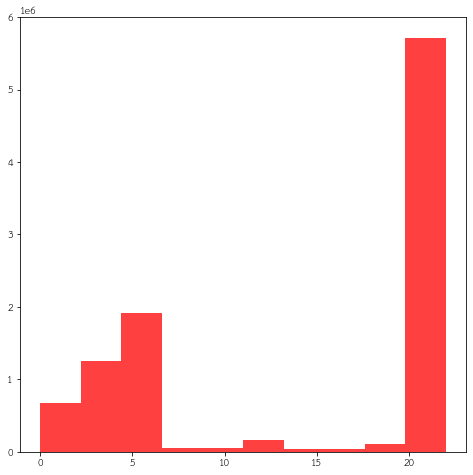

In [ ]:
matplotlib.rcParams['figure.figsize']=[8,8]
output = plt.hist(new_type_nooutlier,10,facecolor = 'red' ,alpha = 0.75)

Quiz 7 เปรียบเทียบความถี่ของแท่งที่มีค่ามากที่สุด กับ แท่งอื่นๆรวมกัน

In [ ]:
output

(array([ 670293., 1247269., 1921441.,   51703.,   50609.,  167502.,
          36883.,   35914.,  105490., 5717238.]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <a list of 10 Patch objects>)

In [ ]:
output[0]

array([ 670293., 1247269., 1921441.,   51703.,   50609.,  167502.,
         36883.,   35914.,  105490., 5717238.])

In [ ]:
output[0][-1]

5717238.0

In [ ]:
sum(output[0][:-1])

4287104.0

## Tree map

In [ ]:
!pip install squarify

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import squarify

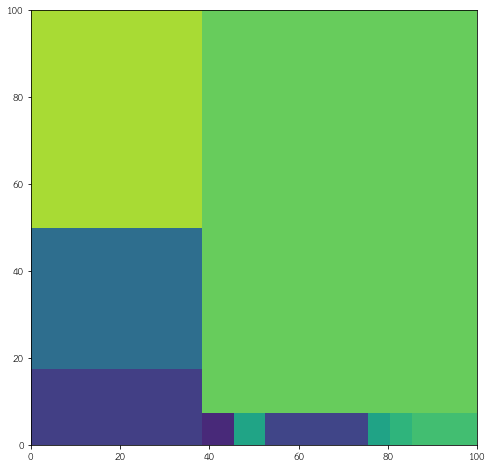

In [ ]:
squarify.plot(output[0])

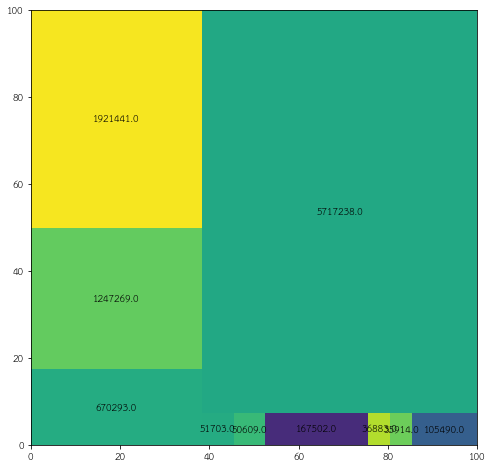

In [ ]:
squarify.plot(output[0],value=output[0])

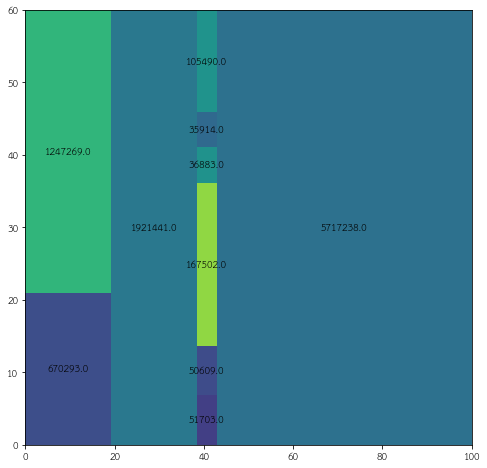

In [ ]:
squarify.plot(output[0],value=output[0],norm_y=60)

## Radar Chart

In [ ]:
import numpy as np
import pandas as pd  #import pandas มาเพราะข้อมูลจะเกี่ยวกับตาราง
import matplotlib.pyplot as plt
from math import pi #import math มาเนื่องจากเกี่ยวกับวงกลมนำมาใช้เพื่อดึงค่าพาย

In [ ]:
data = {'client_id' : ['c1' , 'c2' , 'c3' , 'c4'],
         'cheese' : [2,5,4,3],
         'beer' : [2,1,3,5],
         'chicken' : [5,3,3,4],
        'bread' : [4,3,2,1],
       'coffee' : [2,3,5,3]}
df = pd.DataFrame.from_dict(data)
df

,client_id,cheese,beer,chicken,bread,coffee
0,c1,2,2,5,4,2
1,c2,5,1,3,3,3
2,c3,4,3,3,2,5
3,c4,3,5,4,1,3


In [ ]:
categories = list(df.columns[1:])
categories

['cheese', 'beer', 'chicken', 'bread', 'coffee']

In [ ]:
values = df.mean().values.flatten().tolist()
values += values[:1] # repeat the first value to close the circular graph
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

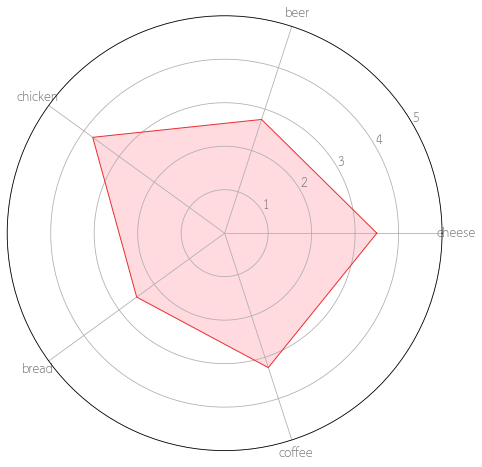

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'],
           color='grey', size=12)

plt.ylim(0, 5)
ax.set_rlabel_position(30)

ax.plot(angles, values, linewidth=1, linestyle='solid' , color = '#ea3033') #เส้นกราฟ
ax.fill(angles, values, 'lightpink', alpha=0.5) #พื้นที่

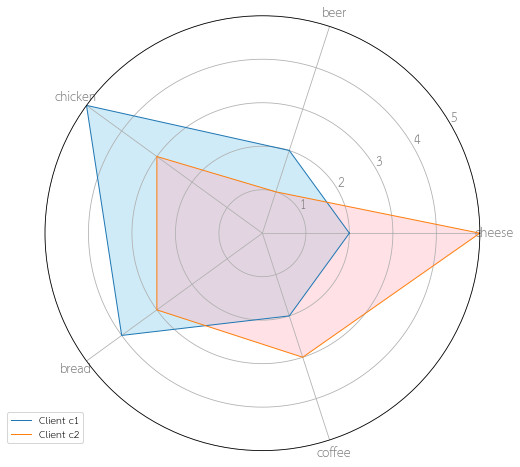

In [ ]:
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'],
           color='grey', size=12)

plt.ylim(0, 5)
ax.set_rlabel_position(30)

# part 1
val_c1 = df.loc[0].drop('client_id').values.flatten().tolist()
val_c1 += val_c1[:1]
ax.plot(angles, val_c1, linewidth=1,
        linestyle='solid', label='Client c1')
ax.fill(angles, val_c1, 'skyblue', alpha=0.4)

# part 2
val_c2=df.loc[1].drop('client_id').values.flatten().tolist()
val_c2 += val_c2[:1]
ax.plot(angles, val_c2, linewidth=1,
        linestyle='solid', label='Client c2')
ax.fill(angles, val_c2, 'lightpink', alpha=0.4)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))